<a href="https://colab.research.google.com/github/mknomics/teaching/blob/main/Final_Exam_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
%matplotlib inline 

In [28]:
def model(X=True, Y=True):

  reg_model = sm.GLS(Y, X).fit()
  #X = sm.add_constant(X,  has_constant='add')  This method did not work for me
  Yhat = reg_model.predict(X) #This method can make predictions but we don't need them in this example
  print(reg_model.summary())
  plt.figure()
  ax1 = sns.distplot(Y, hist=False, color="r", label="Actual Value")
  sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
  plt.legend()
  plt.show()
  plt.close()
  print('log(MSE)=' + str(math.log(mean_squared_error(Yhat,Y)))) # log transform MSE to make the large numbers easier to read.  Log preserves ordinality of data - it is an "affine transformation"
  return

def create_dummy(Categorical=True, dataframe=True):
  dataframe=pd.get_dummies(dataframe[Categorical]).join(dataframe)
  return dataframe

def interact(D=True, X=True, dataframe=True):
  for j in D:
    for k in X:
      dataframe[j+'_'+k]=dataframe[j]*dataframe[k]
  return dataframe


## Load Data into Colab

In [67]:
house_data_path='https://raw.githubusercontent.com/data-doctors/kaggle-house-prices-advanced-regression-techniques/master/data/train.csv'
df_house=pd.read_csv(house_data_path) # invoke Pandas and use read_csv() method passing in the parameter of the csv location, in this case a url address
df_house.head(1) # Visually Inspect that it loaded correctly
#df_house.info() # info() is prefered to .dtypes method because info() gives null counts and dtypes and does not cut the output shortd

# feature engineering age
df_house['age']=df_house['YrSold']-df_house['YearBuilt'] # Age of house when sold
df_house['SF']=df_house['1stFlrSF']+df_house['2ndFlrSF'] # Total Square Feet
df_house['baths']=df_house['FullBath']+df_house['HalfBath'] # Total Number of Bathrooms
df_house['constant']=1 # add a constant for later use in the regressions

df_house = create_dummy(Categorical='SaleCondition', dataframe=df_house)

df_house = create_dummy(Categorical='RoofStyle', dataframe=df_house)

df_house = create_dummy(Categorical='Neighborhood', dataframe=df_house)

df_house = interact(D=['Abnorml'], X=['SF'], dataframe=df_house)
df_house = interact(D=['Abnorml'], X=['age'], dataframe=df_house)

# Model 1
$SalePrice = \beta_0 + \beta_1 WoodDeckSF + \beta_2 SF + \beta_3 Age + \beta_4 Abnorml + \beta_5 (Abnorml \times SF) + \Sigma_{i=6}^{i=25}\beta_i Neigh_i  + \epsilon$

Where $Neigh_i$ is a dummy variable for the $i^{th}$ type of Neighborhood.  I ommitted several neighborhoods and note that my summation goes from 6 to 25 so that the subscripts numbering on my $\beta$'s match with the numbering in the equation.  

$Abnorml$ is a dummy for one category in 'SaleCondition', $SF$ is total square feet of house, $Age$ is defined as Year Sold minus Year Built and $WoodDeckSF$ is a continuous variable for Square Footage of Wood Deck on the house. 

                            GLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.756
Model:                            GLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     177.5
Date:                Wed, 23 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:32:18   Log-Likelihood:                -17515.
No. Observations:                1460   AIC:                         3.508e+04
Df Residuals:                    1434   BIC:                         3.522e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant    7.581e+04   6525.698     11.618      0.0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


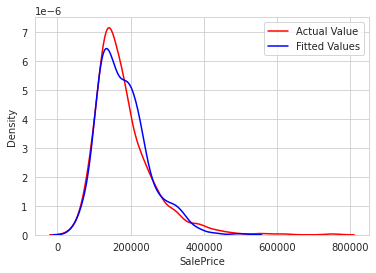

log(MSE)=21.155379124819092


In [83]:
model(X=df_house[['constant','WoodDeckSF','SF','age', 'Abnorml', 'Abnorml_SF','CollgCr', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'SWISU']], Y=df_house['SalePrice'])

# Model 2
$SalePrice = \beta_0 + \beta_1 Wooddeck + \beta_2 SF + \beta_3 Age + \beta_4 Abnorml + \beta_5 (Abnorml \times SF) + \beta_6 Hip  + \epsilon$

                            GLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.689
Model:                            GLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     401.3
Date:                Wed, 23 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:33:40   Log-Likelihood:                -17692.
No. Observations:                1460   AIC:                         3.540e+04
Df Residuals:                    1451   BIC:                         3.545e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant    9.897e+04   5834.650     16.963      0.0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


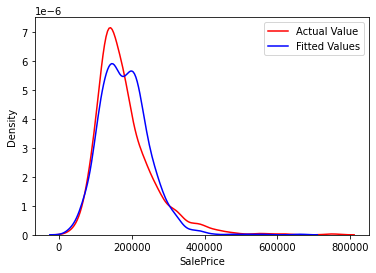

log(MSE)=21.397907298231285


In [69]:
model(X=df_house[['constant','WoodDeckSF','SF','age', 'Abnorml', 'Abnorml_SF', 'Normal','Hip', 'baths']], Y=df_house['SalePrice'])

# Model 3
$SalePrice = \beta_0 + \beta_1 WoodDeckSF + \beta_2 SF + \beta_3 Age + \beta_4 Abnorml + \beta_5 (Abnorml \times SF) + \Sigma_{i=6}^{i=25}\beta_i Neigh_i + \beta_{26} Baths + \epsilon$

Where $Neigh_i$ is a dummy variable for the $i^{th}$ type of Neighborhood.  I ommitted several neighborhoods and note that my summation goes from 6 to 25 so that the subscripts numbering on my $\beta$'s match with the numbering in the equation.  

$Abnorml$ is a dummy for one category in 'SaleCondition', $SF$ is total square feet of house, $Age$ is defined as Year Sold minus Year Built, $Baths$ is the number bathrooms, and $WoodDeckSF$ is a continuous variable for Square Footage of Wood Deck on the house. 

                            GLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.760
Model:                            GLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     174.4
Date:                Wed, 23 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:37:16   Log-Likelihood:                -17503.
No. Observations:                1460   AIC:                         3.506e+04
Df Residuals:                    1433   BIC:                         3.520e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant    8.732e+04   6876.899     12.698      0.0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


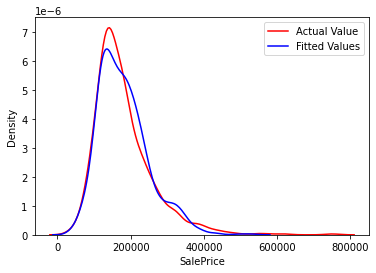

log(MSE)=21.138391062295902


In [72]:
model(X=df_house[['constant','WoodDeckSF','SF','age', 'Abnorml', 'Abnorml_SF','CollgCr', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'SWISU','baths']], Y=df_house['SalePrice'])

# Interpret Scatter Plot
Does this plot offer any support for adding interactions of SF and Number of Baths in a regression model that predicts SalePrice? Would it be ok to designate the ommitted category as houses that have zero baths?

Write your own code that specifies a model according to "Final Exam Prep.docx" available on WolfDen. 

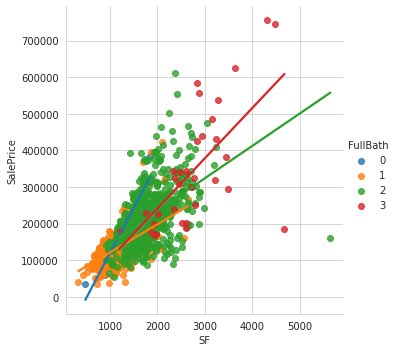

In [82]:
sns.set_style('whitegrid')
sns.lmplot(x ='SF', y ='SalePrice', data = df_house, 
           hue ='FullBath', ci=0)